In [1]:

import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
#Data downloaded from https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017
#using terminal, convert .xtp files to .csv and upload to deepnote 
#pip install xport
#cd to Downloads directory
#python -m xport fild.xtp > file.csv

In [2]:
#Combine csv's for analysis: demographics, alcohol use, diet behavior nutrition, drug use, depression screener, physical functioning
csv_files = ['/work/ALQ_J.csv','/work/DBQ_J.csv', '/work/DUQ_J.csv', '/work/DPQ_J.csv', '/work/PFQ_J.csv']

#Need a populated dataframe to use merge on SEQN, so start with Demographics csv.
df_merged = pd.read_csv('/work/DEMO_J.csv')
#merge all files together
for file in csv_files:
    df_temp = pd.read_csv(file)
    df_merged = df_merged.merge(df_temp, on = 'SEQN', how = 'outer')
#185 columns

In [3]:
#Cut the df down to only the colums we are interested in. 
dem_list = ['SEQN','RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'DMQMILIZ', 'DMQADFC', 'DMDBORN4','DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZE', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR']
dem_list_short = ['SEQN','RIAGENDR', 'RIDRETH1', 'DMQMILIZ', 'DMDEDUC2', 'DMDHHSIZ', 'DMDFMSIZ', 'INDHHIN2', 'INDFMIN2']
alc_list = ['ALQ121', 'ALQ130', 'ALQ142', 'ALQ270', 'ALQ280', 'ALQ290', 'ALQ170']
dbn_list = ['DBQ700', 'DBQ301', 'DBQ330', 'DBD381', 'DBD411', 'DBD895', 'DBD900', 'DBD905', 'DBD910']
dep_list = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']
drug_list = ['DUQ213', 'DUQ230', 'DUQ260', 'DUQ272', 'DUQ280', 'DUQ320', 'DUQ352', 'DUQ360', 'DUQ370', 'DUQ380A', 'DUQ380B', 'DUQ380C', 'DUD380F', 'DUQ410', 'DUQ420', 'DUQ430']
phys_list = ['PFQ049', 'PFQ051', 'PFQ057', 'PFQ061A', 'PFQ061B', 'PFQ061C', 'PFQ061D', 'PFQ061E', 'PFQ061F', 'PFQ061G', 'PFQ061H', 'PFQ061I', 'PFQ061J', 'PFQ061K', 'PFQ061L', 'PFQ061M', 'PFQ061N', 'PFQ061O', 'PFQ061P', 'PFQ061Q', 'PFQ061R', 'PFQ061S', 'PFQ061T']
column_titles = dem_list + alc_list + dbn_list + drug_list + phys_list + dep_list
data = df_merged[column_titles]
data

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,...,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,93703.0,2.0,2.0,5.0,6.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,1.0,2.0,3.0,3.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,2.0,66.0,4.0,4.0,2.0,NaN,1.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,93706.0,1.0,18.0,5.0,6.0,2.0,NaN,1.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,93707.0,1.0,13.0,5.0,7.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102952.0,2.0,70.0,5.0,6.0,2.0,NaN,2.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9250,102953.0,1.0,42.0,1.0,1.0,2.0,NaN,2.0,2.0,77.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9251,102954.0,2.0,41.0,4.0,4.0,2.0,NaN,1.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9252,102955.0,2.0,14.0,4.0,4.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_s = data.copy()


In [5]:
#Make a list of all the columns you are interested in and subset the dataframe. 
alc_dep = ['SEQN'] + alc_list + dep_list + dem_list_short
data_s_alc_dep = data_s[alc_dep]

In [6]:
data_s_alc_dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9254 entries, 0 to 9253
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9254 non-null   float64
 1   ALQ121    4545 non-null   float64
 2   ALQ130    3495 non-null   float64
 3   ALQ142    3495 non-null   float64
 4   ALQ270    1439 non-null   float64
 5   ALQ280    1439 non-null   float64
 6   ALQ290    522 non-null    float64
 7   ALQ170    3487 non-null   float64
 8   DPQ010    5094 non-null   float64
 9   DPQ020    5093 non-null   float64
 10  DPQ030    5093 non-null   float64
 11  DPQ040    5092 non-null   float64
 12  DPQ050    5092 non-null   float64
 13  DPQ060    5091 non-null   float64
 14  DPQ070    5091 non-null   float64
 15  DPQ080    5091 non-null   float64
 16  DPQ090    5090 non-null   float64
 17  DPQ100    3362 non-null   float64
 18  SEQN      9254 non-null   float64
 19  RIAGENDR  9254 non-null   float64
 20  RIDRETH1  9254 non-null   floa

What qualifies as binge drinking? 

Consuming 5 or more drinks on an occasion for men or 4 or more drinks on an occasion for women. 

What qualifies as alcholism?

For men, consuming more than 4 drinks on any day or more than 14 drinks per week. For women, consuming more than 3 drinks on any day or more than 7 drinks per week.

What qualifies as AUD? 

Recurrent alcohol use resulting in a failure to fulfill major role obligations at work, school, or home. Continued alcohol use despite having persistent or recurrent social or interpersonal problems caused or exacerbated by the effects of alcohol.

Symptoms:
Alcohol use disorder can be mild, moderate or severe, based on the number of symptoms you experience. Signs and symptoms may include:

Being unable to limit the amount of alcohol you drink
Wanting to cut down on how much you drink or making unsuccessful attempts to do so
Spending a lot of time drinking, getting alcohol or recovering from alcohol use
Feeling a strong craving or urge to drink alcohol
Failing to fulfill major obligations at work, school or home due to repeated alcohol use
Continuing to drink alcohol even though you know it's causing physical, social, work or relationship problems
Giving up or reducing social and work activities and hobbies to use alcohol
Using alcohol in situations where it's not safe, such as when driving or swimming
Developing a tolerance to alcohol so you need more to feel its effect or you have a reduced effect from the same amount
Experiencing withdrawal symptoms — such as nausea, sweating and shaking — when you don't drink, or drinking to avoid these symptoms

In [7]:
data_s_alc_dep['ALQ142'].value_counts()

0.0     2051
10.0     418
9.0      235
6.0      214
7.0      142
5.0      105
4.0      103
8.0       96
3.0       62
1.0       34
2.0       26
99.0       7
77.0       2
Name: ALQ142, dtype: int64

In [8]:
#avg drinks in a day vs. feeling down, depressed, hopeless
#filter out all rows where people refused to answer or put "dont know" for all alcohol questions 
#(this is not totally necessary, we really only need to filter out rows for the specific column we are looking at any given time.
#If we do this for all questions, it removes too many patients)
data_s_alc_dep_fil = data_s_alc_dep[(data_s_alc_dep['ALQ121'] < 11) & (data_s_alc_dep['ALQ130'] < 16) & (data_s_alc_dep['ALQ142'] < 11)& (data_s_alc_dep['ALQ270'] < 11) & (data_s_alc_dep['ALQ280'] < 11)& (data_s_alc_dep['ALQ290'] < 11)]
data_s_alc_fil = data_s_alc_dep[(data_s_alc_dep['ALQ121'] < 11) & (data_s_alc_dep['ALQ130'] < 16) & (data_s_alc_dep['ALQ142'] < 11)& (data_s_alc_dep['ALQ270'] < 11) & (data_s_alc_dep['ALQ280'] < 11)& (data_s_alc_dep['ALQ290'] < 11)]
data_s_dep_fil = data_s_alc_dep[(data_s_alc_dep['DPQ010'] < 4) & (data_s_alc_dep['DPQ020'] < 4) & (data_s_alc_dep['DPQ030'] < 4)& (data_s_alc_dep['DPQ040'] < 4) & (data_s_alc_dep['DPQ050'] < 4)& (data_s_alc_dep['DPQ060'] < 4) & (data_s_alc_dep['DPQ070'] < 4)& (data_s_alc_dep['DPQ080'] < 4) & (data_s_alc_dep['DPQ090'] < 4)& (data_s_alc_dep['DPQ100'] < 4)]


#sns.histplot(data = data_s_alc_dep_fil, x = 'ALQ130')

In [9]:
#ALQ121: 0 = never, 1= every day --> 10 = 1-2 times in the year
#ALQ130: 1-15 = Avg # of drinks
#ALQ142: 1= every day --> 10 = 1-2 times in the year
#ALQ270: 1= every day --> 10 = 1-2 times in the year
#ALQ280: 1= every day --> 10 = 1-2 times in the year
#ALQ290: 1= every day --> 10 = 1-2 times in the year
#DPQ010: 0 = not at all --> 3 = nearly every day
#DPQ020: 0 = not at all --> 3 = nearly every day
#DPQ030: 0 = not at all --> 3 = nearly every day
#DPQ040: 0 = not at all --> 3 = nearly every day
#DPQ050: 0 = not at all --> 3 = nearly every day
#DPQ060: 0 = not at all --> 3 = nearly every day
#DPQ070: 0 = not at all --> 3 = nearly every day
#DPQ080: 0 = not at all --> 3 = nearly every day
#DPQ090: 0 = not at all --> 3 = nearly every day
#DPQ100: 0 = Not at all difficult --> 3 = Extremely difficult

In [10]:
data_s_alc_dep_fil = data_s_alc_dep_fil.dropna(axis = 0, thresh= 22)
data_s_alc_dep_fil.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 13 to 9250
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      509 non-null    float64
 1   ALQ121    509 non-null    float64
 2   ALQ130    509 non-null    float64
 3   ALQ142    509 non-null    float64
 4   ALQ270    509 non-null    float64
 5   ALQ280    509 non-null    float64
 6   ALQ290    509 non-null    float64
 7   ALQ170    485 non-null    float64
 8   DPQ010    509 non-null    float64
 9   DPQ020    509 non-null    float64
 10  DPQ030    509 non-null    float64
 11  DPQ040    509 non-null    float64
 12  DPQ050    509 non-null    float64
 13  DPQ060    509 non-null    float64
 14  DPQ070    509 non-null    float64
 15  DPQ080    509 non-null    float64
 16  DPQ090    509 non-null    float64
 17  DPQ100    371 non-null    float64
 18  SEQN      509 non-null    float64
 19  RIAGENDR  509 non-null    float64
 20  RIDRETH1  509 non-null    floa

In [11]:
data_s_alc_dep_fil.head()

,SEQN,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,ALQ170,DPQ010,DPQ020,...,DPQ100,SEQN,RIAGENDR,RIDRETH1,DMQMILIZ,DMDEDUC2,DMDHHSIZ,DMDFMSIZ,INDHHIN2,INDFMIN2
13,93716.0,7.0,2.0,10.0,0.0,9.0,10.0,1.0,0.0,0.0,...,0.0,93716.0,1.0,5.0,2.0,5.0,3.0,3.0,15.0,15.0
14,93717.0,1.0,15.0,1.0,1.0,2.0,3.0,0.0,1.0,1.0,...,1.0,93717.0,1.0,3.0,1.0,3.0,2.0,1.0,NaN,4.0
54,93757.0,3.0,5.0,3.0,0.0,10.0,10.0,5.0,1.0,1.0,...,1.0,93757.0,1.0,3.0,1.0,4.0,2.0,2.0,7.0,7.0
56,93759.0,5.0,4.0,8.0,10.0,9.0,0.0,0.0,1.0,0.0,...,0.0,93759.0,1.0,5.0,2.0,5.0,4.0,4.0,12.0,12.0
86,93789.0,3.0,4.0,3.0,0.0,7.0,10.0,12.0,0.0,0.0,...,1.0,93789.0,2.0,3.0,2.0,5.0,1.0,1.0,14.0,14.0


We have 509 patients who have answers for all the alcohol questionnaires, who we can hopefully make some correlations from.

In [12]:
#Counts for different races in our datset
data_s_alc_dep_fil['RIDRETH1'].value_counts()

3.0    222
1.0    100
4.0     73
5.0     66
2.0     48
Name: RIDRETH1, dtype: int64

In [13]:
#1	Mexican American
#2	Other Hispanic
#3	Non-Hispanic White
#4	Non-Hispanic Black
#5	Other Race - Including Multi-Racial
mex_am = (490/data_s_alc_dep_fil['RIDRETH1'].sum())*100
o_his = (310/data_s_alc_dep_fil['RIDRETH1'].sum())*100 
nh_white = (1258/data_s_alc_dep_fil['RIDRETH1'].sum())*100 
nh_black =(802/data_s_alc_dep_fil['RIDRETH1'].sum())*100 
other_mult = (574/data_s_alc_dep_fil['RIDRETH1'].sum())*100 

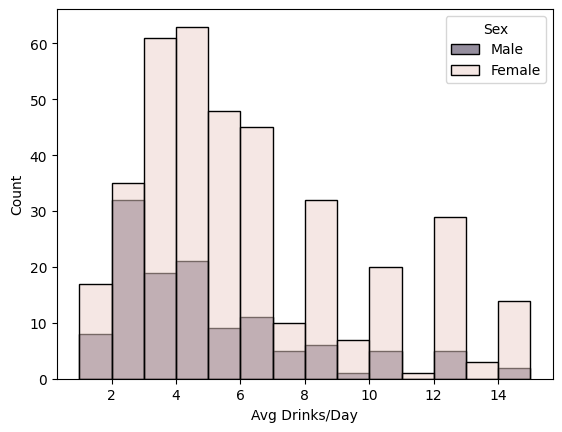

In [14]:
#Avg # Drinks per day in the last year? #1 is male, 2 is female
sns.histplot(data =data_s_alc_dep_fil, x = 'ALQ130', hue = 'RIAGENDR')
plt.xlabel('Avg Drinks/Day')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right', labels=['Male', 'Female'])

This question does not have 0 as an option (which I think is stupid), so this means anyone who has drank at all in the last year has no choice but to say they had on average, 1 drink every day in the last year. Once we fill in the missing values with 0, this will look more realistic I think. 

<AxesSubplot: xlabel='ALQ290', ylabel='Count'>

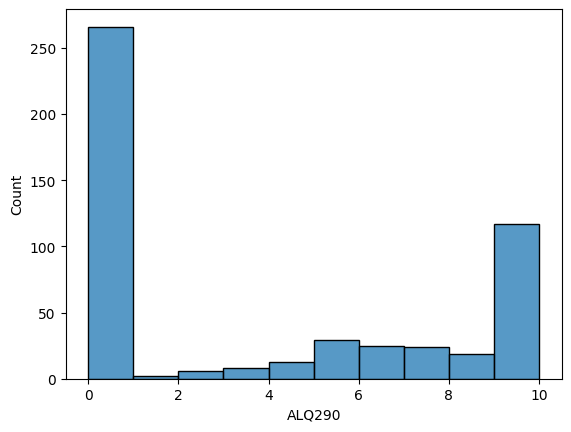

In [15]:
#How often have you had more than 12 drinks in a day in the last year?
sns.histplot(data =data_s_alc_dep_fil, x = 'ALQ290')

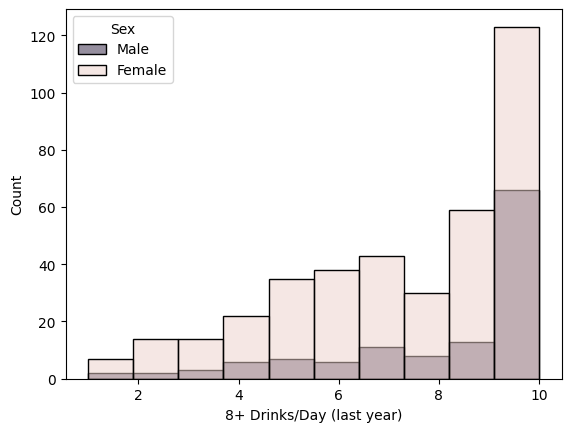

In [16]:
#How often have you had 8+ drinks in a day in the last year? 
#sns.histplot(data =data_s_alc_dep_fil, x = 'ALQ280')

#How often have you had 8+ drinks in a day in the last year?  #1 is male, 2 is female
sns.histplot(data =data_s_alc_dep_fil, x = 'ALQ280', hue = 'RIAGENDR')
plt.xlabel('8+ Drinks/Day (last year)')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper left', labels=['Male', 'Female'])

What if we take all of the people with high alcohol scores and put them into a new dataframe high_alc and then look at correlations among people in that dataset to see what characteristics those people share? Then we can take the people from the no/low alcohol data set and compare them to the high_alc dataset and see if we can find patterns? 

For our project update: Original goal was to generate risk scores for people with high potential for developing disease (AUD) and target them for health resources. 

New Goal: Determine if it's possible to predict someone's alcohol use based on other survey answers. 

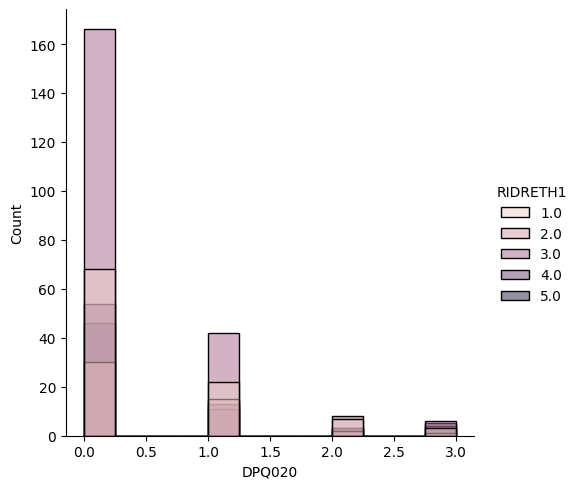

In [17]:
sns.displot(data = data_s_alc_dep_fil, x = 'DPQ020', hue="RIDRETH1")

<AxesSubplot: xlabel='DPQ020', ylabel='Count'>

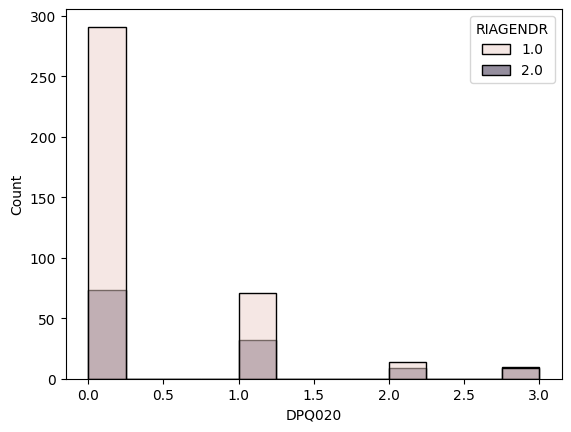

In [18]:
sns.histplot(data = data_s_alc_dep_fil, x = 'DPQ020', hue="RIAGENDR")

Text(0, 0.5, '#Days Feel down/depressed/hopeless (Last year)')

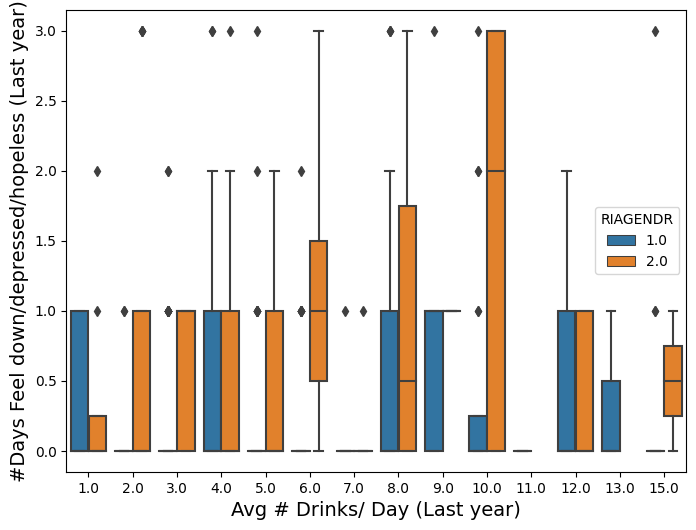

In [19]:
#1 is male, 2 is female
#sns.boxplot(x ='Avg # Drinks/ Day (Last 12 mo)', y ='# Days Feeling down/depressed/hopeless (Last year)', data = data_s_alc_dep_fil, hue ='RIAGENDR')
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x ='ALQ130', y ='DPQ020', data = data_s_alc_dep_fil, hue ='RIAGENDR')
ax.set_xlabel(r'Avg # Drinks/ Day (Last year)', fontsize=14)
ax.set_ylabel(r'#Days Feel down/depressed/hopeless (Last year)', fontsize=14)

Multiple linear regression could be useful to figure out risk scores, while considering multiple factors. 

What questions do I want to answer? 

-Which screener questions from the physical, drug use, and depression screeners correlate with high alcohol consumption?

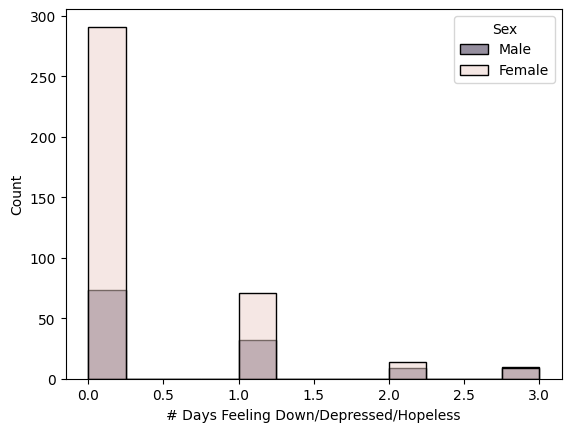

In [20]:
#How many times in the last year have you felt down,depressed, hopeless?  #1 is male, 2 is female
sns.histplot(data =data_s_alc_dep_fil, x = 'DPQ020', hue = 'RIAGENDR')
plt.xlabel('# Days Feeling Down/Depressed/Hopeless')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right', labels=['Male', 'Female'])

In [ ]:
replace_dict = {2:1, 3:1 ,4:2,5:2,6:2, 7:3,8:3, 9:3, 10:4, 11:4, 12:4, 13:4, 15:5}
new_sub1['ALQ130'] = new_sub1['ALQ130'].replace(replace_dict)

replace_dict = {0:1,1: 5, 2: 5, 3:4 ,4:3,7:2}
new_sub1['ALQ121'] = new_sub1['ALQ121'].replace(replace_dict)

replace_dict = {5:0, 3:4,4:5}
new_sub1['PFQ061A'] = new_sub1['PFQ061A'].replace(replace_dict)
replace_dict = {5:0, 3:4,4:5}
new_sub1['PFQ061R'] = new_sub1['PFQ061R'].replace(replace_dict)
replace_dict = {5:0, 3:4,4:5}
new_sub1['PFQ061J'] = new_sub1['PFQ061J'].replace(replace_dict)
replace_dict = {5:0, 3:4,4:5}
new_sub1['PFQ061G'] = new_sub1['PFQ061G'].replace(replace_dict)
replace_dict = {5:0, 3:4,4:5}
new_sub1['PFQ061L'] = new_sub1['PFQ061L'].replace(replace_dict)

new_sub1

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5c47b7dd-303c-4eeb-a54e-b806549f5233' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>